<img align="center" src="./images/occiput_logo3.png" width="400">

# Load dynamic sinogram from listmode PET data
This if useful e.g. for kinetic imaging and motion correction

In [1]:
import occiput
from occiput.Reconstruction.PET.PET_scanners import Biograph_mMR

In [3]:
pet = occiput.Reconstruction.PET.PET_Dynamic_Scan()
pet.set_scanner(Biograph_mMR)

### Bin the listmode data into a series of sinograms
#### All it takes is to define an array with the trigger events in [ms]

In [6]:
time_range = [0,1000,2000,3000]
filename = '../data/PET_data/scans/2014_12_03_cylinder/listmode/PET_ACQ_342_20141212155111-0.l.hdr'
pet.load_listmode_file(filename, time_range_ms=time_range)

In [7]:
prompts0 = pet.frame0.prompts.to_nd_array()
randoms0 = pet.frame0.randoms.to_nd_array()

prompts1 = pet.frame1.prompts.to_nd_array()
randoms1 = pet.frame1.randoms.to_nd_array()

prompts2 = pet.frame2.prompts.to_nd_array()
randoms2 = pet.frame2.randoms.to_nd_array()

prompts_global = pet.static.prompts.to_nd_array()
randoms_global = pet.static.randoms.to_nd_array()

print prompts0.sum()
print randoms0.sum()

print prompts1.sum()
print randoms1.sum()

print prompts2.sum()
print randoms2.sum()

print prompts_global.sum()
print randoms_global.sum()

Uncompression done
Uncompression done
Uncompression done
Uncompression done
Uncompression done
Uncompression done
Uncompression done
Uncompression done


Under the hood, the sinograms (prompts and randoms) are stored in C structures that reside in the global scope of the 
library listmode_c.so. The Python wrapper exposes methods to obtain additional information about these C structures, 
such as compression ratio. This information can be useful for debugging. Let's print the information for the first sinogram (index 0): 

In [17]:
print pet.scanner.listmode.get_measurement_prompt_info(0)
print pet.scanner.listmode.get_measurement_delay_info(0)

{'angles_axial': 0.0, 'time_start': 0L, 'N_u': 344L, 'N_v': 127L, 'N_counts': 244289L, 'compression_ratio': 0.0020062404219061136, 'N_locations': 242962L, 'time_bin': 0L, 'listmode_loss': 1.0054618120193481, 'angles_azimuthal': 0.0, 'N_azimuthal': 11L, 'size_u': 717.6734619140625, 'size_v': 257.96875, 'N_axial': 252L, 'time_end': 1000L}
{'angles_axial': 0.0, 'time_start': 0L, 'N_u': 344L, 'N_v': 127L, 'N_counts': 48713L, 'compression_ratio': 0.00040210355655290186, 'N_locations': 48696L, 'time_bin': 0L, 'listmode_loss': 1.0003491640090942, 'angles_azimuthal': 0.0, 'N_azimuthal': 11L, 'size_u': 717.6734619140625, 'size_v': 257.96875, 'N_axial': 252L, 'time_end': 1000L}


Uncompression done


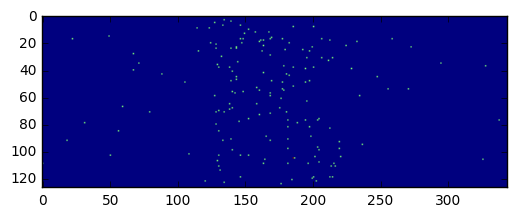

In [11]:
imshow(pet.frame0.prompts.to_nd_array()[0,5,:,:].T)

#### Note that the pet object can be indexed and iterated. We can use pet[0] instead of  pet.frame0 

Uncompression done


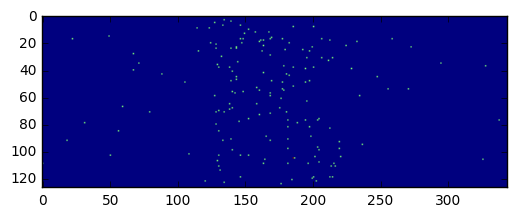

In [18]:
imshow(pet[0].prompts.to_nd_array()[0,5,:,:].T)